In [ ]:
#---------------------------------------------------------------------------------------
# --------------------------------------                                                |
#| Author: Kevin Brian Kwan Chong Loo   |                                               |
#| ID: A01192177                        |                                               |
#| Date: September 30th, 2019           |                                               |
#| Email: kb.kwanloo@gmail.com          |                                               |
# --------------------------------------                                                |
#                                                                                       |
#The presented code generates graphs based on the results presented in the file         |
#	generated with the Evaluation of Classifiers. It only requires the name of the 		|
#	file and specifying the column of interest in the file. In this implementation,		|
#	the value of interest if the maximum ROC-AUC among all the classifiers.				|
#---------------------------------------------------------------------------------------


In [1]:
from google.colab import drive
drive.mount("/content/gdrive", force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
4/3wF5mr80_wll8rk3cj_q_Z4YiWTg-qiZ1anppF7V8qJ8y_muU14Pa58
Mounted at /content/gdrive


In [2]:
import numpy as np
import math
import random
import numpy as np
import matplotlib.pyplot as plt
import os
os.chdir("gdrive/My Drive/Machine_learning_team/Assignment_2/")

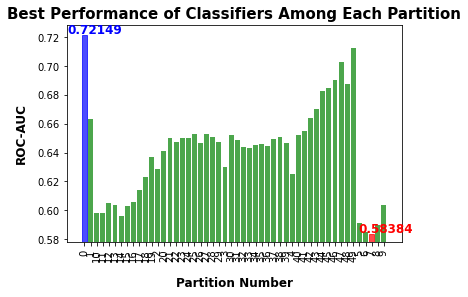

In [3]:
#Name of the file generated with the Evaluation of Classifiers.
fileIn = "./2Cluster_Evaluations_10_Fold_complete.txt"

count = 0
name = ""
val = 0
partitions = []
bestAUC = []
for line in open(fileIn, "r"):
	#The first line is ignored since it only describes the values in each column.
	if(count != 0):
		numberOfValues = len(line.split(","))-1
		first = 0
		for data in line.split(","):
			if(first == 0):
				name = data[data.find("_")+1:data.find(".")]
			elif(first == numberOfValues):
				val = float(data)

			first += 1

		#The number of the partition is stored.
		partitions.append(int(name))
		#The value of interest is saved.
		bestAUC.append(val)

	count = 1

#Obtaining the maximum and Minimum value among the best AUC among the classifiers per instance.
bestAUCIndex = bestAUC.index(max(bestAUC))
worstAUCIndex = bestAUC.index(min(bestAUC))

#Plotting bar graphs with certain aesthetic alterations for better visualization.
y_pos = np.arange(len(partitions))
fig,ax = plt.subplots()
barlist = ax.bar(y_pos, bestAUC, align='center', alpha=0.7, color=['green'])
barlist[bestAUCIndex].set_color('b')
barlist[worstAUCIndex].set_color('r')

for i, v in enumerate(bestAUC):
	if(i == bestAUCIndex):
		ax.text(i-2.8, v+.001, str(v), color='blue', fontweight='bold', size=12)
	if(i == worstAUCIndex):
		ax.text(i-2.1, v+.001, str(v), color='red', fontweight='bold', size=12)

plt.xticks(y_pos, partitions,rotation='vertical')
plt.ylabel('ROC-AUC',fontweight='bold',size=12, labelpad=10)
plt.ylim((min(bestAUC)*0.99, max(bestAUC)*1.01))
plt.xlabel('Partition Number',fontweight='bold', size=12,labelpad=15)
plt.title('Best Performance of Classifiers Among Each Partition',fontweight='bold',size=15)

plt.show()